In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import mne  
import tqdm

import scipy.signal as signal
import scipy.stats as stats
import scipy.io as sio

import random
import datetime
import os
import copy
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [12]:
# pathing

# test
path = "/home/SharedFiles/Data/HospitalData/EEG/SNUCH_VEM_EDF"
annot_dir = '/home/SharedFiles/Projects/EEG/Data/annotated_raws'
seg_dir = '/home/SharedFiles/Projects/EEG/Data/seg_raws'
xl_path = os.path.join(path, 'SNUCH 2020 labeling 수정.xlsx')

# #final
# path = input('Enter input directory path:')
# annot_dir = os.path.join(path, ,'processed', 'annotated_raws')
# seg_dir = os.path.join(path, 'processed', 'seg_raws')
# xl_path = input('Enter path to excel sheet:')

if not os.path.exists(annot_dir):
    os.makedirs(annot_dir)
if not os.path.exists(seg_dir):
    os.makedirs(seg_dir)

In [13]:
# load annotated fif paths

annot_fif_paths = []
for it in os.listdir(annot_dir):
    fif_pth = os.path.join(annot_dir, it)
    annot_fif_paths.append(fif_pth)

In [14]:
# #plot first 3
# for annot_fif_path in annot_fif_paths[:3]:
#     raw = mne.io.read_raw_fif(annot_fif_path, verbose=False)
#     picks = mne.pick_types(raw.info, eeg=True)
#     raw.plot(order=picks, n_channels=21)

In [15]:
# sample
raw = mne.io.read_raw_fif(annot_fif_paths[0], verbose=False)

/tmp/ipykernel_13777/677053143.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)


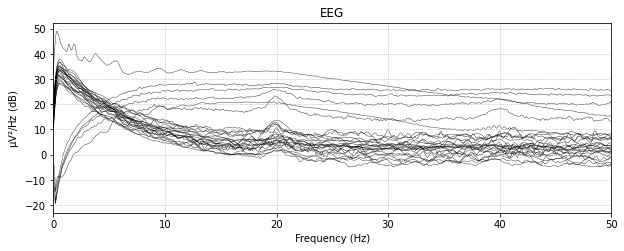

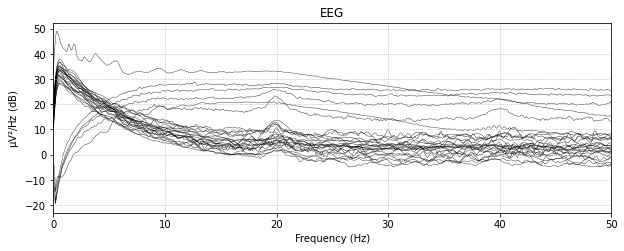

In [16]:
raw.plot_psd(fmax=50)

In [17]:
# num channels
len(raw.info['chs'])

27

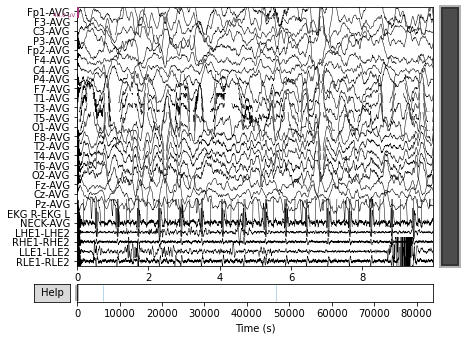

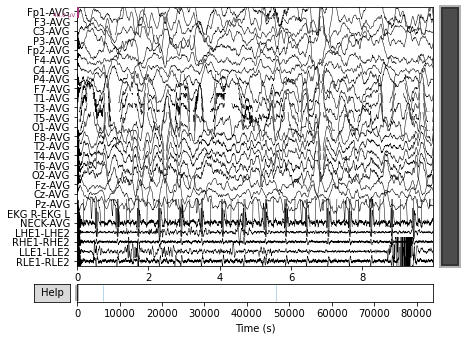

In [18]:
# plot all channels
raw.plot(n_channels = 27)

In [19]:
raw.info['ch_names']

['Fp1-AVG',
 'F3-AVG',
 'C3-AVG',
 'P3-AVG',
 'Fp2-AVG',
 'F4-AVG',
 'C4-AVG',
 'P4-AVG',
 'F7-AVG',
 'T1-AVG',
 'T3-AVG',
 'T5-AVG',
 'O1-AVG',
 'F8-AVG',
 'T2-AVG',
 'T4-AVG',
 'T6-AVG',
 'O2-AVG',
 'Fz-AVG',
 'Cz-AVG',
 'Pz-AVG',
 'EKG R-EKG L',
 'NECK-AVG',
 'LHE1-LHE2',
 'RHE1-RHE2',
 'LLE1-LLE2',
 'RLE1-RLE2']

In [20]:
eeg_chans = raw.info['ch_names'][:21]
eeg_chans

['Fp1-AVG',
 'F3-AVG',
 'C3-AVG',
 'P3-AVG',
 'Fp2-AVG',
 'F4-AVG',
 'C4-AVG',
 'P4-AVG',
 'F7-AVG',
 'T1-AVG',
 'T3-AVG',
 'T5-AVG',
 'O1-AVG',
 'F8-AVG',
 'T2-AVG',
 'T4-AVG',
 'T6-AVG',
 'O2-AVG',
 'Fz-AVG',
 'Cz-AVG',
 'Pz-AVG']

In [21]:
eeg_raw = raw.pick(eeg_chans)

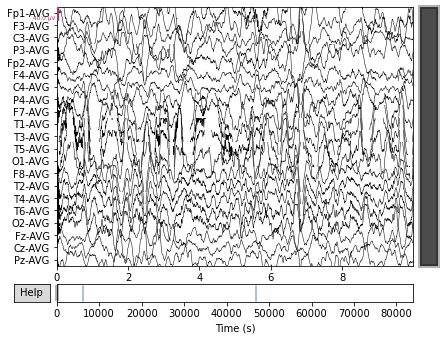

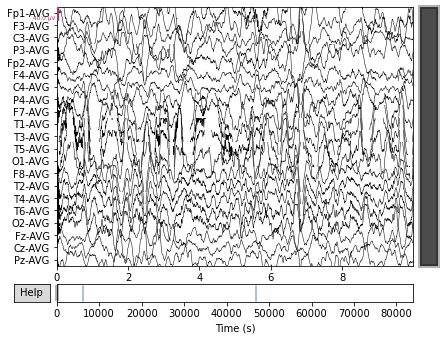

In [22]:
eeg_raw.plot(n_channels=27) # should only print out 21

### Sensor Locations
* https://mne.tools/dev/auto_tutorials/intro/40_sensor_locations.html#tut-sensor-locations

No position data loaded

In [26]:
eeg_raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1-AVG, F3-AVG, C3-AVG, P3-AVG, Fp2-AVG, F4-AVG, C4-AVG, ...
 chs: 21 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2021-05-03 17:26:46 UTC
 meas_id: 4 items (dict)
 nchan: 21
 projs: []
 sfreq: 200.0 Hz
>

In [27]:
eeg_raw.info['sfreq']

200.0

In [28]:
eeg_raw.plot_sensors(show_names=True)
fig = eeg_raw.plot_sensors('3d')

RuntimeError: No valid channel positions found

In [ ]:
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
print(ten_twenty_montage)

In [ ]:
raw_1020 = eeg_raw.copy().set_montage(ten_twenty_montage)

In [ ]:
fig = ten_twenty_montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)  # set view angle
ten_twenty_montage.plot(kind='topomap', show_names=True)